In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [2]:
sns.set_context('talk')

In [3]:
cd O:\TUD\__eDICE-paper\__for-paper\data_publication\dumbbell-shapes

O:\TUD\__eDICE-paper\__for-paper\data_publication\dumbbell-shapes


# Experimental data: GUV sizes

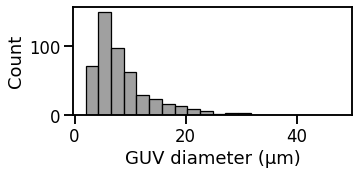

In [4]:
f = plt.figure(figsize=[5, 2])

# load sizes (measured in Fiji)
df_sizes = pd.read_csv('GUV-sizes_experimental.txt', index_col=0)

# plot histogram
ax=sns.histplot( data=df_sizes, x='diameter (um)', 
               bins=20, color='grey',)
ax.set_xlabel('GUV diameter (\u03bcm)')

# save plot
fig = ax.get_figure()
fig.savefig('GUV-sizes.png', dpi=300, bbox_inches='tight')

# Experimental data: dumbbell shapes

In [5]:
df_dumbbells = pd.read_csv('dumbbells_overview_experimental.txt', sep='\t', decimal="," )
df_dumbbells.head(3)

,date,run,file,bright half diameter,dark half diameter,neck diameter,actin encapsulated?,enrichment?,cortex?,microscope
0,20211022,6,20201022_run6_overview_001-1,15.000,20.930,7.50,1,0.5,1.0,minicell
1,20211022,5,20201022_run5_GUV10_zstack,19.435,16.965,15.89,1,1.0,0.5,minicell
2,20211022,5,20201022_run5_GUV8_zstack-1,8.970,9.945,8.00,1,1.0,1.0,minicell


Calculate geometric parameters

In [6]:
df_dumbbells['bright to dark size ratio'] = df_dumbbells['bright half diameter'] / df_dumbbells['dark half diameter']
df_dumbbells['avg half diameter'] = (df_dumbbells['bright half diameter'] + df_dumbbells['dark half diameter'] ) / 2
df_dumbbells['neck to lobe ratio'] = df_dumbbells['neck diameter'] / df_dumbbells['avg half diameter']

### Plot: size ratio of the two halves

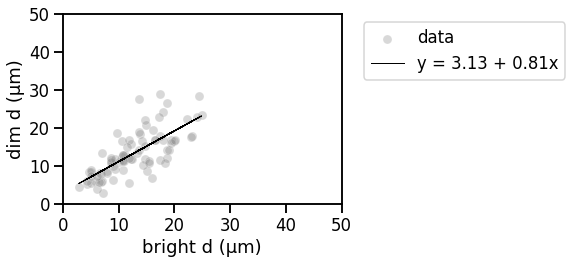

In [7]:
f = plt.figure(figsize=[5, 3.5])

# plot data points
ax = sns.scatterplot(data=df_dumbbells, 
                     x='bright half diameter', y='dark half diameter', color='grey', alpha=0.3)


# Create linear regression object
regr = linear_model.LinearRegression()
X_train = df_dumbbells['bright half diameter'].values.reshape(-1, 1)
Y_train = df_dumbbells['dark half diameter'].values.reshape(-1, 1)
X_test = df_dumbbells['bright half diameter'].values.reshape(-1, 1)
Y_test = df_dumbbells['dark half diameter'].values.reshape(-1, 1)
# Train the model using the training sets
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# plot linear fit
plt.plot( X_test, Y_pred, color='k', linewidth=1)

# make plot pretty
plt.legend( ('data', 'y = {} + {}x'.format(np.round(regr.intercept_[0],2), 
                                  np.round(regr.coef_[0][0],2)),),
           bbox_to_anchor=(1.05, 1), loc=2 ,  )
ax.set_xlabel('bright d (\u03bcm)')
ax.set_ylabel('dim d (\u03bcm)')
ax.set_xlim(0,50)
ax.set_ylim(0,50)

# save plot
fig = ax.get_figure()
fig.savefig('dumbbell_halves.png', dpi=300, bbox_inches='tight')

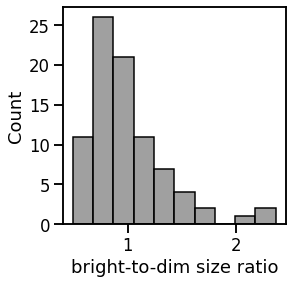

In [8]:
f = plt.figure(figsize=[4, 4])

# plot histogram of size ratios
ax=sns.histplot( data=df_dumbbells, x='bright to dark size ratio', #col='enrichment?', 
               bins=10, color='grey',)#.despine(top=False, right=False)# facet_kws={despine})#data=df_dumbbells,)
ax.set_xlabel('bright-to-dim size ratio')

# save plot
fig = ax.get_figure()
fig.savefig('dumbbell_sizeratio.png', dpi=300, bbox_inches='tight')

In [9]:

print('Number of dumbbells with larger dim lobe: '+str(len(df_dumbbells.loc[df_dumbbells['bright to dark size ratio']< 1])))
print('Number of dumbbells with larger bright lobe: '+str(len(df_dumbbells.loc[df_dumbbells['bright to dark size ratio']>= 1])))

Number of dumbbells with larger dim lobe: 54
Number of dumbbells with larger bright lobe: 31


### Plot: size ratio of neck to average lobe

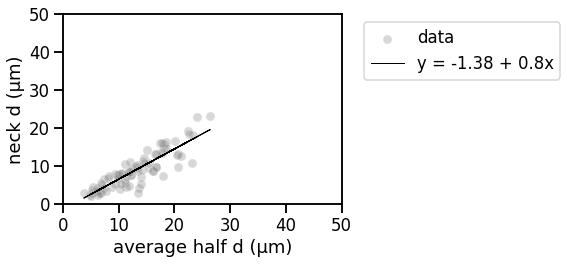

In [10]:
f = plt.figure(figsize=[5, 3.5])

# plot data points
ax = sns.scatterplot(data=df_dumbbells, 
                     x='avg half diameter', y='neck diameter', 
                     color='grey', alpha=0.3)

# Create linear regression object
regr = linear_model.LinearRegression()
X_train = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_train = df_dumbbells['neck diameter'].values.reshape(-1, 1)
X_test = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_test = df_dumbbells['neck diameter'].values.reshape(-1, 1)
# Train the model using the training sets
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# plot linear fit 
plt.plot( X_test, Y_pred, color='k', linewidth=1)

# make plot pretty
plt.legend(( 'data','y = {} + {}x'.format(np.round(regr.intercept_[0],2), 
                                          np.round(regr.coef_[0][0],2))),
           bbox_to_anchor=(1.05, 1), loc=2 ,  )
ax.set_xlabel('average half d (\u03bcm)')
ax.set_ylabel('neck d (\u03bcm)')
ax.set_xlim(0,50)
ax.set_ylim(0,50)

# save plot
fig = ax.get_figure()
fig.savefig('dumbbell_shape.png', dpi=300, bbox_inches='tight')

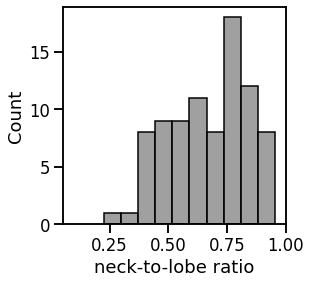

In [11]:
f = plt.figure(figsize=[4, 4])

ax=sns.histplot( data=df_dumbbells, x='neck to lobe ratio', #col='enrichment?', 
               bins=10, color='grey',)#.despine(top=False, right=False)# facet_kws={despine})#data=df_dumbbells,)

ax.set_xlabel('neck-to-lobe ratio')
ax.set_xlim(0.05,1)

fig = ax.get_figure()
fig.savefig('neck-to-lobe_sizeratio.png', dpi=300, bbox_inches='tight')

In [12]:
print('Total number of dumbbells: '+str(len(df_dumbbells)))

Total number of dumbbells: 85


# Consistency between dumbbells with and without actin inside

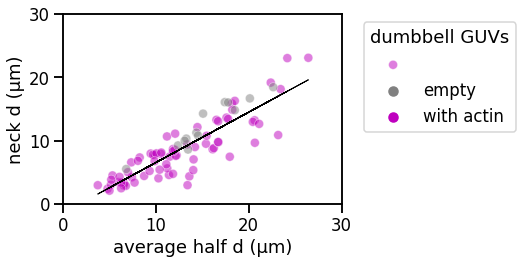

In [13]:
f = plt.figure(figsize=[5, 3.5])

# plot data points, color coding whether actin was encapsulated
ax = sns.scatterplot(data=df_dumbbells, 
                     x='avg half diameter', y='neck diameter', 
                     hue='actin encapsulated?', palette=['grey', 'm'], alpha=0.5)

# Create linear regression object
regr = linear_model.LinearRegression()
X_train = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_train = df_dumbbells['neck diameter'].values.reshape(-1, 1)
X_test = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_test = df_dumbbells['neck diameter'].values.reshape(-1, 1)
# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

plt.plot( X_test, Y_pred, color='k', linewidth=1)

plt.legend(['', 'empty', 'with actin'], 
           title='dumbbell GUVs', 
           bbox_to_anchor=(1.05, 1), loc=2 )


ax.set_xlabel('average half d (\u03bcm)')
ax.set_ylabel('neck d (\u03bcm)')
ax.set_xlim(0,30)
ax.set_ylim(0,30)

# save plot
fig = ax.get_figure()
fig.savefig('dumbbell_shape_actinn.png', dpi=300, bbox_inches='tight')

# Consistency between dumbbells from different formation methods

In [14]:
df_other = pd.read_csv('dumbbells_alternative-techniques.txt', sep='\t', decimal="," )
df_other['avg half diameter'] = (df_other['dark half diameter'] + df_other['bright half diameter'])/2
df_other.head(3)

,date,run,file,bright half diameter,dark half diameter,neck diameter,enrichment?,cortex?,microscope,method,avg half diameter
0,20211117,Tom_S3,S3_GUV_DNA_LUV_DNA_osmotic_shock_013.nd2,12.00,7.93,7.01,0,0,Minicell,gel swelling,9.965
1,20211117,Tom_S3,S3_GUV_DNA_LUV_DNA_osmotic_shock_009.nd2 (seri...,12.35,11.31,10.64,0,0,Minicell,gel swelling,11.830
2,20211117,Tom_S3,S3_GUV_DNA_LUV_DNA_osmotic_shock_009-1,22.00,19.11,16.41,0,0,Minicell,gel swelling,20.555


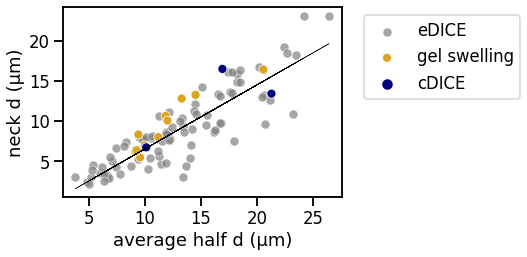

In [15]:
f = plt.figure(figsize=[5, 3.5])

# plot data points from eDICE vesicles
ax = sns.scatterplot(data=df_dumbbells, 
                     x='avg half diameter', y='neck diameter', 
                     color='grey', alpha=0.7)

# plot data points from other techniques, color coded by technique
ax = sns.scatterplot(data=df_other, 
                     x='avg half diameter', y='neck diameter', 
                     hue='method', hue_order=['cDICE', 'gel swelling'], 
                     palette=[ 'navy', 'goldenrod',], alpha=1)

# Create linear regression object
regr = linear_model.LinearRegression()
X_train = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_train = df_dumbbells['neck diameter'].values.reshape(-1, 1)
X_test = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_test = df_dumbbells['neck diameter'].values.reshape(-1, 1)
# Train the model using the training sets
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# plot linear fit
plt.plot( X_test, Y_pred, color='k', linewidth=0.5)

# make plot pretty
plt.legend(( 'eDICE', 'gel swelling', 'cDICE' ), #,'y = {} + {}x'.format(np.round(regr.intercept_[0],2), 
                                          #np.round(regr.coef_[0][0],2))),
           bbox_to_anchor=(1.05, 1), loc=2 ,  )
ax.set_xlabel('average half d (\u03bcm)')
ax.set_ylabel('neck d (\u03bcm)')

# save figure
fig = ax.get_figure()
fig.savefig('dumbbell_shape_+other-techniques_newdata.png', dpi=300, bbox_inches='tight')

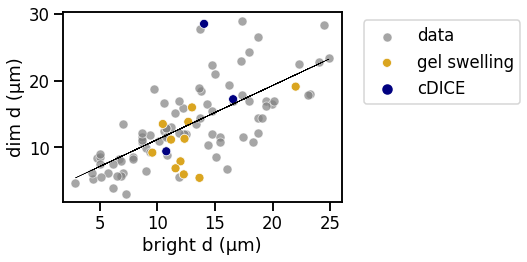

In [16]:
f = plt.figure(figsize=[5, 3.5])

# plot data points from eDICE vesicles
ax = sns.scatterplot(data=df_dumbbells, 
                     x='bright half diameter', y='dark half diameter', color='grey', alpha=0.7)

# plot data points from other techniques, color coded by technique
ax = sns.scatterplot(data=df_other, 
                     x='bright half diameter', y='dark half diameter', 
                     hue='method', hue_order=['cDICE', 'gel swelling'], 
                     palette=[ 'navy', 'goldenrod',], alpha=1)


# Create linear regression object
regr = linear_model.LinearRegression()
X_train = df_dumbbells['bright half diameter'].values.reshape(-1, 1)
Y_train = df_dumbbells['dark half diameter'].values.reshape(-1, 1)
X_test = df_dumbbells['bright half diameter'].values.reshape(-1, 1)
Y_test = df_dumbbells['dark half diameter'].values.reshape(-1, 1)
# Train the model using the training sets
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# plot linear fit
plt.plot( X_test, Y_pred, color='k', linewidth=0.5)

# make plot pretty
plt.legend( ('data', 'gel swelling', 'cDICE',),
             #'y = {} + {}x'.format(np.round(regr.intercept_[0],2), 
             #                     np.round(regr.coef_[0][0],2)),),
           bbox_to_anchor=(1.05, 1), loc=2 ,  )
ax.set_xlabel('bright d (\u03bcm)')
ax.set_ylabel('dim d (\u03bcm)')

# save plot
fig = ax.get_figure()
fig.savefig('dumbbell-halves_+other-techniques_newdata.png', dpi=300, bbox_inches='tight')

# Simulated shape data

In [17]:
df_dumbbells = pd.read_csv('Simulated_Data.csv')
df_dumbbells.head(3)

,# bright half diameter (µm),dark half diameter (µm),average diameter (µm),neck diameter (µm)
0,16.977539,17.673138,17.325339,16.633559
1,7.438790,7.745553,7.592171,7.409317
2,16.531294,11.390613,13.960954,11.364975


In [18]:
# make naming consistent with experimental data
df_dumbbells.rename(columns={'# bright half diameter (µm)': 'bright half diameter', 
                            ' dark half diameter (µm)': 'dark half diameter', 
                            ' average diameter (µm)': 'avg half diameter', 
                            ' neck diameter (µm)': 'neck diameter'}, inplace=True)

In [19]:
# calculate shape descriptors
df_dumbbells['bright to dark size ratio'] = df_dumbbells['bright half diameter'] / df_dumbbells['dark half diameter']
df_dumbbells['neck to lobe ratio'] = df_dumbbells['neck diameter'] / df_dumbbells['avg half diameter']

### Plotting: simulated dumbbell shapes

size ratio of the two halves

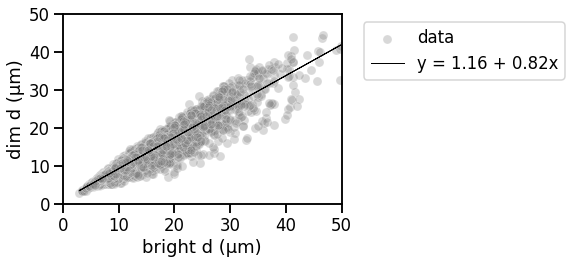

In [20]:
f = plt.figure(figsize=[5, 3.5])

# plot data points
ax = sns.scatterplot(data=df_dumbbells, 
                     x='bright half diameter', y='dark half diameter', color='grey', alpha=0.3)

# Create linear regression object
regr = linear_model.LinearRegression()
X_train = df_dumbbells['bright half diameter'].values.reshape(-1, 1)
Y_train = df_dumbbells['dark half diameter'].values.reshape(-1, 1)
X_test = df_dumbbells['bright half diameter'].values.reshape(-1, 1)
Y_test = df_dumbbells['dark half diameter'].values.reshape(-1, 1)
# Train the model using the training sets
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# plot fit
plt.plot( X_test, Y_pred, color='k', linewidth=1)

# make plot pretty
plt.legend( ('data', 'y = {} + {}x'.format(np.round(regr.intercept_[0],2), 
                                  np.round(regr.coef_[0][0],2)),),
           bbox_to_anchor=(1.05, 1), loc=2 ,  )
ax.set_xlabel('bright d (\u03bcm)')
ax.set_ylabel('dim d (\u03bcm)')
ax.set_xlim(0,50)
ax.set_ylim(0,50)

# save plot
fig = ax.get_figure()
fig.savefig('dumbbell_halves.png', dpi=300, bbox_inches='tight')

size ratio of neck to body

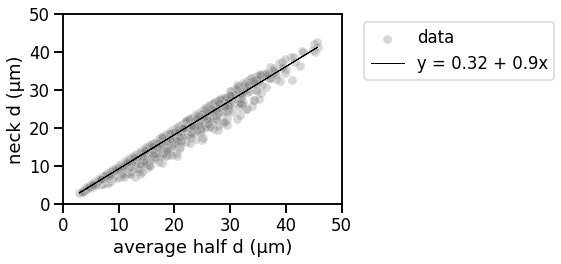

In [21]:
f = plt.figure(figsize=[5, 3.5])

# plot data points
ax = sns.scatterplot(data=df_dumbbells, 
                     x='avg half diameter', y='neck diameter', 
                     color='grey', alpha=0.3)

# Create linear regression object
regr = linear_model.LinearRegression()
X_train = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_train = df_dumbbells['neck diameter'].values.reshape(-1, 1)
X_test = df_dumbbells['avg half diameter'].values.reshape(-1, 1)
Y_test = df_dumbbells['neck diameter'].values.reshape(-1, 1)
# Train the model using the training sets
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# plot linear fit
plt.plot( X_test, Y_pred, color='k', linewidth=1)

# make plot pretty
plt.legend(( 'data','y = {} + {}x'.format(np.round(regr.intercept_[0],2), 
                                          np.round(regr.coef_[0][0],2))),
           bbox_to_anchor=(1.05, 1), loc=2 ,  )
ax.set_xlabel('average half d (\u03bcm)')
ax.set_ylabel('neck d (\u03bcm)')
ax.set_xlim(0,50)
ax.set_ylim(0,50)

# save plot
fig = ax.get_figure()
fig.savefig('dumbbell_shape.png', dpi=300, bbox_inches='tight')